In [2]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

np.random.seed(42)

In [3]:
## GONNA DO IT FOR RECOMPLETION
data_pd = pd.read_excel("TO_TACC_RCOMPL.xlsx")

subset = data_pd[data_pd['CONTRACTOR'].notnull()]

quant_df = subset.loc[:, subset.dtypes==float]
mean_repl = quant_df.isna().sum()
impute = lambda col: col.fillna(col.mean())
imputed_df = quant_df.apply(impute, axis=0)
imputed_df.dropna(inplace=True, axis=1)

FileNotFoundError: [Errno 2] No such file or directory: 'TO_TACC_RCOMPL.xlsx'

In [3]:
mean_repl

FRAC_GRADIENT                     393
BREAKDOWN_PRESSURE                303
HYDROSTATIC_PRESSURE               43
TREAT_AVG_PRESSURE                  2
TREAT_MAX_PRESSURE                  2
TREAT_MIN_PRESSURE                746
PROPPANT_DESIGNED                   1
PROPPANT_IN_WELLBORE              415
AVG_HYDRAULIC_POWER                 3
MAX_PUMP_POWER                     49
MAX_PUMP_RATING                   260
TREAT_AVG_RATE                      2
TREAT_MAX_RATE                      2
TREAT_MIN_RATE                     10
POST_INSTANT_SHUT_IN_PRESSURE     478
INITIAL_SHUT_IN_PRESSURE           55
PRE_INSTANT_SHUT_IN_PRESSURE      404
STG_ELEMENT_TOP_DEPTH            1115
STG_ELEMENT_BOTTOM_DEPTH         1115
STG_INITIAL_PUMPING_PRESSURE      746
STG_FINAL_PUMPING_PRESSURE          2
STG_BREAKDOWN_PRESSURE            303
STG_VOLUME_RECOVERED              586
PUMPSONLINENO                     886
USERNUM1                          914
USERNUM3                          886
DURPUMP     

In [4]:
imputed_df

,FRAC_GRADIENT,BREAKDOWN_PRESSURE,HYDROSTATIC_PRESSURE,TREAT_AVG_PRESSURE,TREAT_MAX_PRESSURE,TREAT_MIN_PRESSURE,PROPPANT_DESIGNED,PROPPANT_IN_WELLBORE,AVG_HYDRAULIC_POWER,MAX_PUMP_POWER,...,PUMPSONLINENO,USERNUM1,USERNUM3,DURPUMP,TOP_DEPTH_TVD,PROPOSED,Prod_Per_Stage,Errors_Per_Stage,AVG PRESSURE (PSI),AVG HHP
0,1.0,6740.0,5576.0,9358.0,9765.0,7346.000000,152125.0,1909.991929,12780.0,13932.000000,...,16.000000,18.000000,13.000000,120.000000,12872.0,0.0,3218.482759,7.810345,9358.000000,12780.0
1,1.0,5100.0,5724.0,7280.0,9347.0,5100.000000,0.0,0.000000,8618.0,12279.000000,...,16.511719,18.158108,15.869792,112.623782,12991.0,0.0,0.000000,3.630435,7280.000000,8618.0
2,1.0,4901.0,5087.0,4999.0,5384.0,6911.194934,0.0,0.000000,7864.0,15760.335826,...,16.511719,18.158108,15.869792,112.623782,11793.0,0.0,2217.629630,2.814815,8586.109228,7864.0
3,1.0,5304.0,5623.0,9496.0,9602.0,6911.194934,130000.0,1909.991929,11606.0,16880.000000,...,18.000000,19.000000,18.000000,112.623782,12985.0,0.0,26156.490741,4.592593,8695.000000,11606.0
4,1.0,7340.0,5494.0,9523.0,9916.0,6911.194934,366938.0,1909.991929,16441.0,19362.000000,...,17.000000,18.000000,16.000000,0.000000,12685.0,0.0,-1.000000,-1.000000,9523.000000,16441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,1.0,6954.0,4844.0,8928.0,10377.0,6911.194934,192000.0,1909.991929,19547.0,23061.000000,...,20.000000,21.000000,20.000000,55.000000,11188.0,0.0,1009.759259,4.398148,8928.000000,19547.0
1650,1.0,4773.0,4837.0,8697.0,9622.0,6911.194934,192000.0,1909.991929,18982.0,21486.000000,...,20.000000,21.000000,19.000000,62.000000,11173.0,0.0,1009.759259,4.398148,8697.000000,18982.0
1651,1.0,5336.0,4829.0,8929.0,10049.0,6911.194934,192000.0,1909.991929,10545.0,22430.000000,...,20.000000,21.000000,19.000000,62.000000,11152.0,0.0,1009.759259,4.398148,8929.000000,19545.0
1652,1.0,6099.0,4818.0,9094.0,9721.0,6911.194934,192000.0,1909.991929,19694.0,21592.000000,...,20.000000,21.000000,19.000000,61.000000,11128.0,0.0,1009.759259,4.398148,9094.000000,19694.0


In [5]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(imputed_df), columns=imputed_df.columns)

In [6]:
scaled_df

,FRAC_GRADIENT,BREAKDOWN_PRESSURE,HYDROSTATIC_PRESSURE,TREAT_AVG_PRESSURE,TREAT_MAX_PRESSURE,TREAT_MIN_PRESSURE,PROPPANT_DESIGNED,PROPPANT_IN_WELLBORE,AVG_HYDRAULIC_POWER,MAX_PUMP_POWER,...,PUMPSONLINENO,USERNUM1,USERNUM3,DURPUMP,TOP_DEPTH_TVD,PROPOSED,Prod_Per_Stage,Errors_Per_Stage,AVG PRESSURE (PSI),AVG HHP
0,1.0,0.654369,0.415718,0.819772,0.843481,0.801091,0.105661,0.00147,0.060347,0.121375,...,0.727273,0.600000,0.590909,0.200334,0.702212,0.0,0.074775,0.051522,0.889193,0.121637
1,1.0,0.495146,0.427835,0.476811,0.775613,0.556161,0.000000,0.00000,0.040694,0.106974,...,0.750533,0.615811,0.721354,0.188020,0.749210,0.0,0.000023,0.027079,0.678336,0.075446
2,1.0,0.475825,0.375686,0.100347,0.132164,0.753674,0.000000,0.00000,0.037134,0.137303,...,0.750533,0.615811,0.721354,0.188020,0.276066,0.0,0.051530,0.022309,0.810869,0.067078
3,1.0,0.514951,0.419566,0.842548,0.817016,0.753674,0.090293,0.00147,0.054803,0.147058,...,0.818182,0.700000,0.818182,0.188020,0.746840,0.0,0.607531,0.032705,0.821918,0.108608
4,1.0,0.712621,0.409005,0.847004,0.867998,0.753674,0.254862,0.00147,0.077634,0.168681,...,0.772727,0.600000,0.727273,0.000000,0.628357,0.0,0.000000,0.000000,0.905936,0.162268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,1.0,0.675146,0.355792,0.748803,0.942848,0.753674,0.133356,0.00147,0.092300,0.200906,...,0.909091,0.900000,0.909091,0.091820,0.037125,0.0,0.023476,0.031568,0.845561,0.196739
1650,1.0,0.463398,0.355219,0.710678,0.820263,0.753674,0.133356,0.00147,0.089632,0.187185,...,0.909091,0.900000,0.863636,0.103506,0.031201,0.0,0.023476,0.031568,0.822121,0.190469
1651,1.0,0.518058,0.354564,0.748968,0.889592,0.753674,0.133356,0.00147,0.049793,0.195409,...,0.909091,0.900000,0.863636,0.103506,0.022907,0.0,0.023476,0.031568,0.845662,0.196717
1652,1.0,0.592136,0.353664,0.776201,0.836337,0.753674,0.133356,0.00147,0.092994,0.188108,...,0.909091,0.900000,0.863636,0.101836,0.013428,0.0,0.023476,0.031568,0.862405,0.198371


In [7]:
data = scaled_df.to_numpy()

In [8]:
data

array([[1.        , 0.65436893, 0.41571838, ..., 0.05152248, 0.8891933 ,
        0.12163722],
       [1.        , 0.49514563, 0.42783463, ..., 0.02707857, 0.67833587,
        0.07544615],
       [1.        , 0.47582524, 0.37568563, ..., 0.02230886, 0.81086852,
        0.06707804],
       ...,
       [1.        , 0.51805825, 0.35456406, ..., 0.03156812, 0.8456621 ,
        0.19671713],
       [1.        , 0.59213592, 0.35366353, ..., 0.03156812, 0.86240487,
        0.19837077],
       [1.        , 0.5415534 , 0.35243553, ..., 0.03156812, 0.86930492,
        0.20174465]])

[0.22340467 0.13671338 0.13105546 0.12380309 0.08152429 0.06615711
 0.04646819 0.03742594 0.0364391  0.02693825]
0.9099294868947385


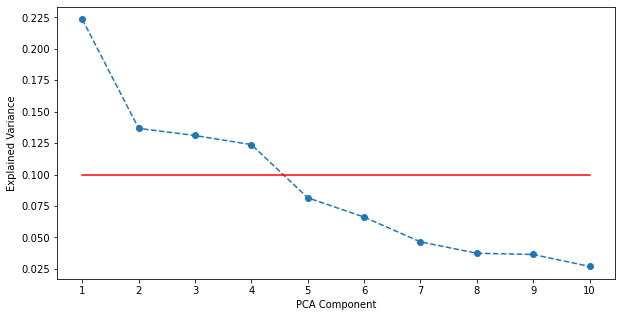

In [9]:
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(data)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))


plt.figure(figsize=(10,5))
plt.plot(range(1,11),pca.explained_variance_ratio_, 'o--')
plt.plot(range(1,11),[.1 for i in range(1,11)], 'r-')
plt.xlabel("PCA Component")
plt.ylabel("Explained Variance")
plt.xticks(range(1,11));

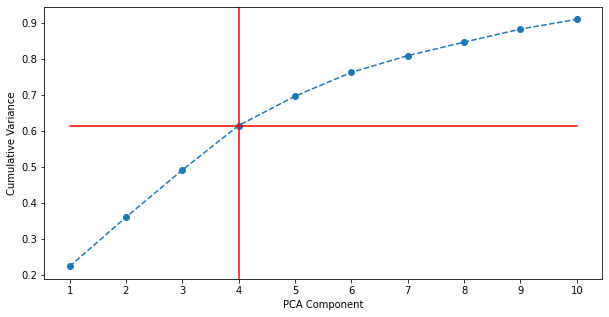

In [10]:
cum_var = []

cum_var.append(pca.explained_variance_ratio_[0])

for i in range(1, len(pca.explained_variance_ratio_)):
    cum_var.append(cum_var[i-1] + pca.explained_variance_ratio_[i])

plt.figure(figsize=(10,5))
plt.plot(range(1,11), cum_var, 'o--')
plt.axvline(x=4, c="Red")
plt.plot(range(1,11), [cum_var[3] for i in range(10)], 'r')
plt.xlabel("PCA Component")
plt.ylabel("Cumulative Variance")
plt.xticks(range(1,11));

In [11]:
reduced_data = reduced_data[:, 0:4]
reduced_data.shape

(1654, 4)

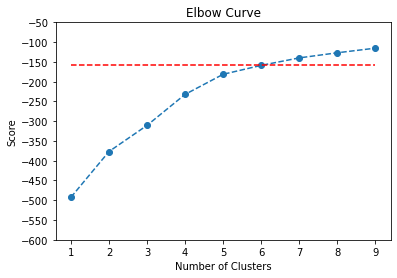

In [12]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(reduced_data).score(reduced_data) for i in range(len(kmeans))]
score
plt.plot(Nc,score, "o--")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Elbow Curve")
plt.plot(Nc, [score[5] for i in range(1,10)], 'r--')
plt.yticks(range(-600, 0, 50))
plt.show()

In [13]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(reduced_data)

colormap = np.array(['Red', 'Blue', 'Green', 'Orange', 'Black', 'Magenta'])

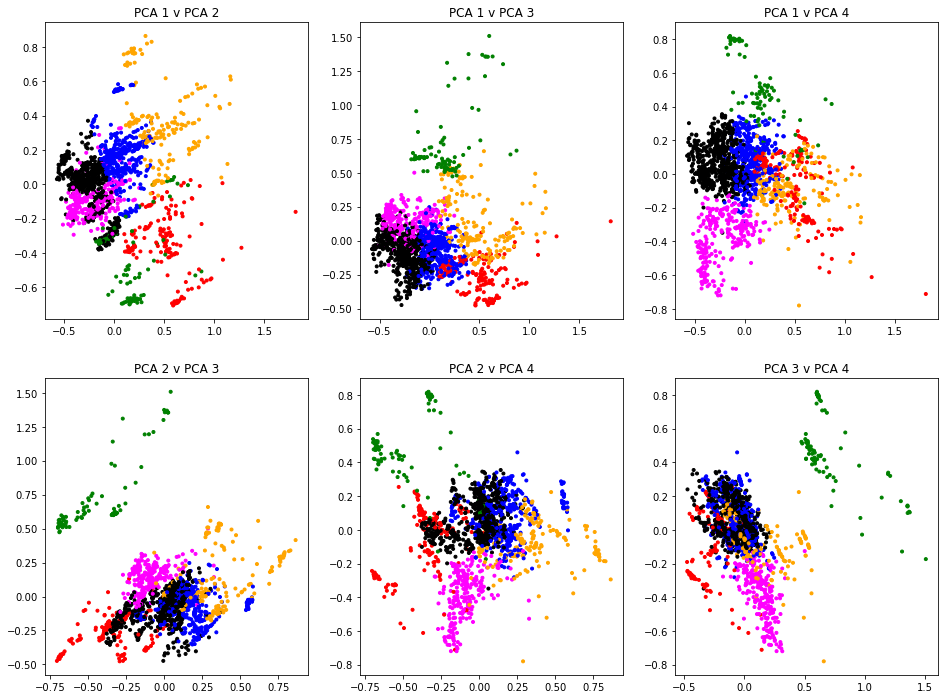

In [14]:
fig, axs = plt.subplots(2,3, figsize=(16,12))

axs[0,0].scatter(reduced_data[:, 0], reduced_data[:, 1], marker = '.', c = colormap[kmeans.labels_])
axs[0,0].set_title("PCA 1 v PCA 2");
axs[0,1].scatter(reduced_data[:, 0], reduced_data[:, 2], marker = '.', c = colormap[kmeans.labels_])
axs[0,1].set_title("PCA 1 v PCA 3");
axs[0,2].scatter(reduced_data[:, 0], reduced_data[:, 3], marker = '.', c = colormap[kmeans.labels_])
axs[0,2].set_title("PCA 1 v PCA 4");
axs[1,0].scatter(reduced_data[:, 1], reduced_data[:, 2], marker = '.', c = colormap[kmeans.labels_])
axs[1,0].set_title("PCA 2 v PCA 3");
axs[1,1].scatter(reduced_data[:, 1], reduced_data[:, 3], marker = '.', c = colormap[kmeans.labels_])
axs[1,1].set_title("PCA 2 v PCA 4");
axs[1,2].scatter(reduced_data[:, 2], reduced_data[:, 3], marker = '.', c = colormap[kmeans.labels_])
axs[1,2].set_title("PCA 3 v PCA 4");

plt.show()

In [ ]:
for feature in data_pd.columns.values:
    try:
        if data_pd[feature].dtypes != 'float64':
            imputed_D2 = data_pd[feature].fillna('missing')
            le = LabelEncoder()
            ft = le.fit_transform(imputed_D2.values)
            tickers = le.inverse_transform(np.unique(ft))
            print(feature)

            plt.figure(figsize=(10,8))
            plt.scatter(reduced_data[:, 0], reduced_data[:,2], s = 10, alpha = 0.5, c=ft, cmap=plt.cm.get_cmap('tab20', len(tickers)))
            cb = plt.colorbar(ticks=range(len(tickers)))
            cb.set_ticklabels(tickers)
            plt.clim(-0.5, len(tickers)-0.5)
            plt.title("PCA 1 v PCA 3");
            plt.show()


        else:
            print(feature)

            plt.figure(figsize=(10,8))
            plt.scatter(reduced_data[:, 0], reduced_data[:,2], s = 10, alpha = 0.5, c=ft, cmap=plt.cm.get_cmap('tab20', len(tickers)))
            plt.colorbar()
            plt.title("PCA 1 v PCA 3");
            plt.show()
    except:
        pass

In [ ]:
#NOT FINISHED

In [ ]:
quant_df.columns

In [ ]:
for f in quant_df.columns:
    if("PSI" in f):
        print(f)

In [ ]:
pot_recompl = [
    "TREAT_AVG_PRESSURE",
    "TREAT_MAX_PRESSURE",
    "MAX_PUMP_RATING",
    "STG_ELEMENT_TOP_DEPTH",
    "STG_ELEMENT_BOTTOM_DEPTH",
    "STG_FINAL_PUMPING_PRESSURE",
    "TOP_DEPTH_TVD",
    "Prod_Per_Stage",
    "AVG PRESSURE (PSI)"
]

In [ ]:
i = 0
while(i < len(pot_recompl)):
    print(pot_recompl[i])
    if(mean_repl[pot_recompl[i]] > 500):
        pot_recompl.remove(pot_recompl[i])
    else:
        i += 1

In [ ]:
pot_recompl

In [ ]:
to_remove = [
    "TOP_DEPTH_TVD",
]

for r in to_remove:
    pot_recompl.remove(r)

In [ ]:
pot_recompl

In [ ]:
imputed_df

In [ ]:
data_pd

In [ ]:
for feature in imputed_df:
    data_pd[feature] = imputed_df[feature]

In [ ]:
data_pd["PCA-X"] = reduced_data[:,0]
data_pd["PCA-Y"] = reduced_data[:,1]

data_pd.to_excel("TO_TACC_RCOMPL-PCA.xlsx")

In [ ]:
reduced_data.shape

In [15]:
## GONNA DO IT FOR STMSTG
data_pd = pd.read_excel("TO_TACC_STM_STG.xlsx")

subset = data_pd[data_pd['CONTRACTOR'].notnull()]

quant_df = subset.loc[:, subset.dtypes==float]
mean_repl = quant_df.isna().sum()
impute = lambda col: col.fillna(col.mean())
imputed_df = quant_df.apply(impute, axis=0)
imputed_df.dropna(inplace=True, axis=1)

In [16]:
mean_repl

FRAC_GRADIENT                      453
BREAKDOWN_PRESSURE                 316
HYDROSTATIC_PRESSURE               153
TREAT_AVG_PRESSURE                   6
TREAT_MAX_PRESSURE                   5
TREAT_MIN_PRESSURE                9798
PROPPANT_DESIGNED                    3
PROPPANT_IN_FORMATION                2
PROPPANT_IN_WELLBORE              7268
AVG_HYDRAULIC_POWER                 90
MAX_PUMP_POWER                     132
MAX_PUMP_RATING                   2919
TREAT_AVG_RATE                       6
TREAT_MAX_RATE                       5
TREAT_MIN_RATE                      26
POST_INSTANT_SHUT_IN_PRESSURE      854
INITIAL_SHUT_IN_PRESSURE            62
PRE_INSTANT_SHUT_IN_PRESSURE       428
STG_TOP_DEPTH                      170
STG_BOTTOM_DEPTH                   170
STG_ELEMENT_TOP_DEPTH            10767
STG_ELEMENT_BOTTOM_DEPTH         10772
STG_INITIAL_PUMPING_PRESSURE      9798
STG_FINAL_PUMPING_PRESSURE           5
STG_BREAKDOWN_PRESSURE             316
STG_VOLUME_RECOVERED     

In [17]:
imputed_df

,FRAC_GRADIENT,BREAKDOWN_PRESSURE,HYDROSTATIC_PRESSURE,TREAT_AVG_PRESSURE,TREAT_MAX_PRESSURE,TREAT_MIN_PRESSURE,PROPPANT_DESIGNED,PROPPANT_IN_FORMATION,PROPPANT_IN_WELLBORE,AVG_HYDRAULIC_POWER,...,USERNUM3,DURPUMP,TOP_DEPTH_TVD,BOTTOM_DEPTH_TVD,PROPOSED,Stage_Length (meters),Prod_Per_Stage,Errors_Per_Stage,AVG PRESSURE (PSI),AVG HHP
0,1.0,6547.0,4984.000000,9919.0,10176.0,6550.000000,104000.0,104060.0,0.000000,16793.0,...,16.328487,114.161617,11508.0,11504.0,0.000000,65.0,36707.875000,9.300000,9919.0,16793.0
1,1.0,7348.0,5031.000000,10027.0,10525.0,7348.000000,104000.0,104000.0,0.000000,22069.0,...,16.328487,114.161617,11598.0,11604.0,0.000000,65.0,35123.342105,9.078947,10027.0,22069.0
2,1.0,6740.0,5576.000000,9358.0,9765.0,7346.000000,152125.0,152125.0,6705.145891,12780.0,...,13.000000,120.000000,12872.0,12876.0,0.000000,73.0,3218.482759,7.810345,9358.0,12780.0
3,1.0,5100.0,5724.000000,7280.0,9347.0,5100.000000,0.0,0.0,0.000000,8618.0,...,16.328487,114.161617,12991.0,13064.0,0.000000,5264.0,0.000000,3.630435,7280.0,8618.0
4,1.0,6026.0,4696.000000,8298.0,9349.0,6026.000000,104000.0,104780.0,0.000000,13950.0,...,16.328487,114.161617,10829.0,10826.0,0.000000,65.0,23077.516129,10.000000,8298.0,13950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17716,1.0,7360.0,5695.000000,11086.0,11211.0,7628.501956,420000.0,420000.0,0.000000,22305.0,...,18.000000,103.000000,13130.0,13134.0,0.000000,144.0,-1.000000,-1.000000,11086.0,22305.0
17717,1.0,6913.0,5329.105134,9695.0,10136.0,7628.501956,420000.0,420000.0,0.000000,18958.0,...,15.000000,108.000000,11574.0,11573.0,0.011998,142.0,27219.318182,9.704545,9695.0,18958.0
17718,1.0,8132.0,5714.000000,10778.0,11080.0,7628.501956,420000.0,420000.0,0.000000,16239.0,...,17.000000,152.000000,13176.0,13176.0,0.000000,143.0,-1.000000,-1.000000,10778.0,16239.0
17719,1.0,7366.0,5329.105134,10098.0,10337.0,7628.501956,420000.0,422369.0,6705.145891,18315.0,...,16.000000,110.000000,11739.0,11735.0,0.000000,142.0,27219.318182,9.704545,10098.0,18315.0


In [18]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(imputed_df), columns=imputed_df.columns)

In [19]:
scaled_df

,FRAC_GRADIENT,BREAKDOWN_PRESSURE,HYDROSTATIC_PRESSURE,TREAT_AVG_PRESSURE,TREAT_MAX_PRESSURE,TREAT_MIN_PRESSURE,PROPPANT_DESIGNED,PROPPANT_IN_FORMATION,PROPPANT_IN_WELLBORE,AVG_HYDRAULIC_POWER,...,USERNUM3,DURPUMP,TOP_DEPTH_TVD,BOTTOM_DEPTH_TVD,PROPOSED,Stage_Length (meters),Prod_Per_Stage,Errors_Per_Stage,AVG PRESSURE (PSI),AVG HHP
0,0.5,0.585076,0.101956,0.870546,0.092136,0.596974,0.072235,0.072276,0.000000,0.071947,...,0.742204,0.185327,0.837434,0.836960,0.000000,0.336200,0.077224,0.060234,0.090897,0.083463
1,0.5,0.656658,0.102917,0.880025,0.095296,0.669705,0.072235,0.072235,0.000000,0.094551,...,0.742204,0.185327,0.843987,0.844239,0.000000,0.336200,0.073890,0.058941,0.091888,0.109685
2,0.5,0.602324,0.114066,0.821309,0.088415,0.669522,0.105661,0.105661,0.005161,0.054754,...,0.590909,0.194805,0.936736,0.936822,0.000000,0.337094,0.006773,0.051522,0.085752,0.063518
3,0.5,0.455764,0.117094,0.638933,0.084630,0.464820,0.000000,0.000000,0.000000,0.036922,...,0.742204,0.185327,0.945399,0.950506,0.000000,0.916899,0.000002,0.027079,0.066694,0.042832
4,0.5,0.538517,0.096064,0.728278,0.084648,0.549216,0.072235,0.072777,0.000000,0.059766,...,0.742204,0.185327,0.788002,0.787612,0.000000,0.336200,0.048550,0.064327,0.076031,0.069333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17716,0.5,0.657730,0.116500,0.972968,0.101508,0.695270,0.291717,0.291717,0.000000,0.095562,...,0.818182,0.167208,0.955518,0.955601,0.000000,0.345024,0.000000,0.000000,0.101600,0.110858
17717,0.5,0.617784,0.109015,0.850886,0.091774,0.695270,0.291717,0.291717,0.000000,0.081222,...,0.681818,0.175325,0.842239,0.841983,0.011998,0.344801,0.057263,0.062600,0.088843,0.094223
17718,0.5,0.726720,0.116889,0.945936,0.100321,0.695270,0.291717,0.291717,0.000000,0.069573,...,0.772727,0.246753,0.958867,0.958658,0.000000,0.344912,0.000000,0.000000,0.098776,0.080709
17719,0.5,0.658266,0.109015,0.886256,0.093594,0.695270,0.291717,0.293363,0.005161,0.078467,...,0.727273,0.178571,0.854252,0.853774,0.000000,0.344801,0.057263,0.062600,0.092539,0.091027


In [20]:
data = scaled_df.to_numpy()
data

array([[0.5       , 0.58507596, 0.10195565, ..., 0.06023392, 0.09089742,
        0.08346256],
       [0.5       , 0.65665773, 0.10291711, ..., 0.05894121, 0.09188793,
        0.1096847 ],
       [0.5       , 0.6023235 , 0.11406595, ..., 0.05152248, 0.08575228,
        0.06351762],
       ...,
       [0.5       , 0.72672029, 0.11688896, ..., 0.        , 0.09877562,
        0.08070913],
       [0.5       , 0.65826631, 0.10901532, ..., 0.06259968, 0.09253909,
        0.09102702],
       [0.5       , 0.65308311, 0.10901532, ..., 0.06259968, 0.08942083,
        0.08734419]])

[0.35512059 0.26097665 0.08882796 0.07388724 0.05532762 0.04185561
 0.03220523 0.01451981 0.01356449 0.01100296]
0.9472881760730043


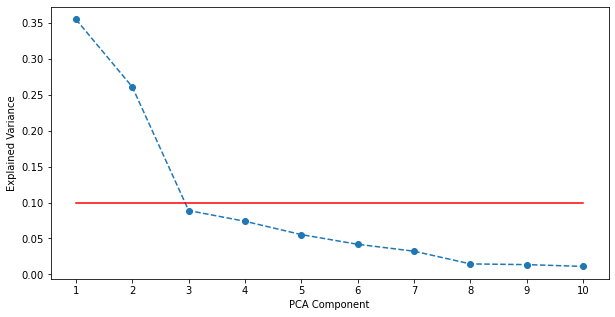

In [21]:
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(data)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))


plt.figure(figsize=(10,5))
plt.plot(range(1,11),pca.explained_variance_ratio_, 'o--')
plt.plot(range(1,11),[.1 for i in range(1,11)], 'r-')
plt.xlabel("PCA Component")
plt.ylabel("Explained Variance")
plt.xticks(range(1,11));

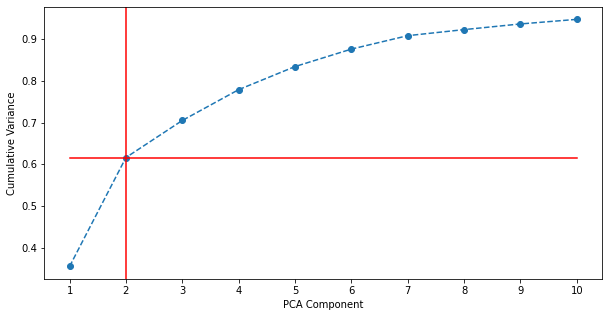

In [23]:
cum_var = []

cum_var.append(pca.explained_variance_ratio_[0])

for i in range(1, len(pca.explained_variance_ratio_)):
    cum_var.append(cum_var[i-1] + pca.explained_variance_ratio_[i])

plt.figure(figsize=(10,5))
plt.plot(range(1,11), cum_var, 'o--')
plt.axvline(x=2, c="Red")
plt.plot(range(1,11), [cum_var[1] for i in range(10)], 'r')
plt.xlabel("PCA Component")
plt.ylabel("Cumulative Variance")
plt.xticks(range(1,11));

In [24]:
reduced_data = reduced_data[:, 0:2]
reduced_data.shape

(17721, 2)

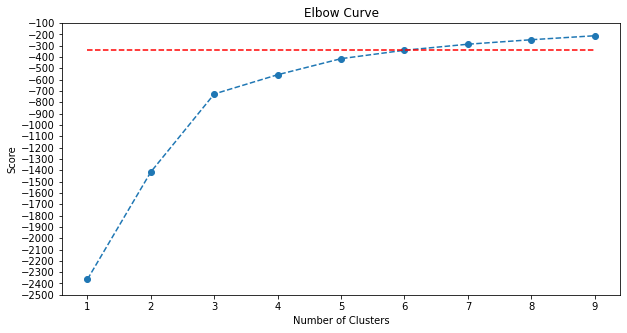

In [30]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(reduced_data).score(reduced_data) for i in range(len(kmeans))]
score
plt.figure(figsize=(10,5))
plt.plot(Nc,score, "o--")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Elbow Curve")
plt.plot(Nc, [score[5] for i in range(1,10)], 'r--')
plt.yticks(range(-2500, 0, 100))
plt.show()

In [31]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(reduced_data)

colormap = np.array(['Red', 'Blue', 'Green', 'Orange', 'Black', 'Magenta'])

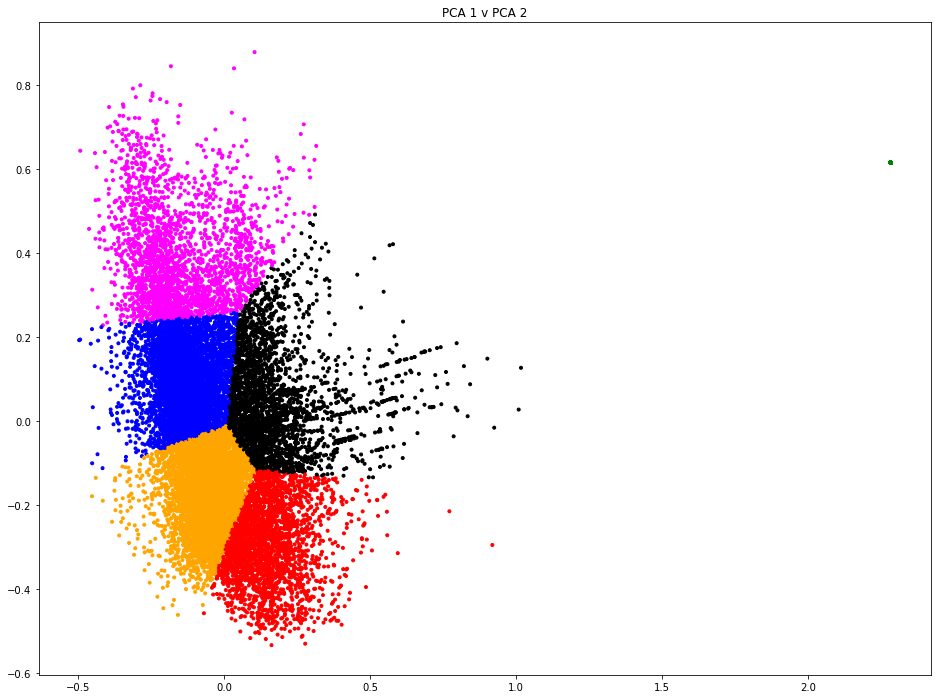

In [38]:
plt.figure(figsize=(16,12))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], marker = '.', c = colormap[kmeans.labels_])
plt.title("PCA 1 v PCA 2");

plt.show()

In [ ]:
for feature in data_pd.columns.values:
    try:
        if data_pd[feature].dtypes != 'float64':
            imputed_D2 = data_pd[feature].fillna('missing')
            le = LabelEncoder()
            ft = le.fit_transform(imputed_D2.values)
            tickers = le.inverse_transform(np.unique(ft))
            print(feature)

            plt.figure(figsize=(10,8))
            plt.scatter(reduced_data[:, 0], reduced_data[:,2], s = 10, alpha = 0.5, c=ft, cmap=plt.cm.get_cmap('tab20', len(tickers)))
            cb = plt.colorbar(ticks=range(len(tickers)))
            cb.set_ticklabels(tickers)
            plt.clim(-0.5, len(tickers)-0.5)
            plt.title("PCA 1 v PCA 3");
            plt.show()


        else:
            print(feature)

            plt.figure(figsize=(10,8))
            plt.scatter(reduced_data[:, 0], reduced_data[:,2], s = 10, alpha = 0.5, c=ft, cmap=plt.cm.get_cmap('tab20', len(tickers)))
            plt.colorbar()
            plt.title("PCA 1 v PCA 3");
            plt.show()
    except:
        pass

In [ ]:
## NOT FINISHED

In [ ]:
mean_repl

In [ ]:
pot_stmstg = [
    "BREAKDOWN_PRESSURE",
    "TREAT_AVG_PRESSURE",
    "PROPPANT_IN_FORMATION",
    "POST_INSTANT_SHUT_IN_PRESSURE",
    "INITIAL_SHUT_IN_PRESSURE",
    "STG_TOP_DEPTH",
    "STG_BOTTOM_DEPTH",
    "STG_INITIAL_PUMPING_PRESSURE",
    "STG_BREAKDOWN_PRESSURE",
    "TOP_DEPTH_TVD",
    "BOTTOM_DEPTH_TVD",
    "Stg_Duration (hrs)"
]


i = 0
while(i < len(pot_stmstg)):
    if(pot_stmstg[i] in mean_repl and mean_repl[pot_stmstg[i]] > 1000):
        pot_stmstg.remove(pot_stmstg[i])
    else:
        i += 1
        
pot_stmstg

In [ ]:
to_remove = [
    "STG_BREAKDOWN_PRESSURE",
    "STG_TOP_DEPTH",
    "STG_BOTTOM_DEPTH",
    "TOP_DEPTH_TVD",
    "BOTTOM_DEPTH_TVD"
]

for r in to_remove:
    print(r)
    pot_stmstg.remove(r)

In [ ]:
for feature in imputed_df:
    data_pd[feature] = imputed_df[feature]

In [ ]:
data_pd["PCA-X"] = reduced_data[:,0]
data_pd["PCA-Y"] = reduced_data[:,1]

data_pd.to_excel("TO_TACC_STM_STG-PCA.xlsx")

In [ ]:
pot_stmstg

In [ ]:
pot_recompl